# Part 2: Statistics (DSFS Chapter 5)

## _Exercises_: Chapter 5 (just some questions from the text)

### Mean and median: Explain the difference between the mean and the median in your own words. In what kinds of dataset are the mean and median similar? Can you think of a dataset where the mean and median would be very different?

The deference between median and mean is, that the mean is the average of all elements. Where the median is the elements sorted from smallest to largest, if the list is odd then the median is the middle number, if the list is even the two middlemost elements are added together and then divided by two. Or said in other words if the list is even we take the mean of the two middlemost numbers.

### Variance: Explain the variance in your own words.

The variance is how much difference there is in the responses from the calculation

### A paradox: What is Simpson's Paradox. Provide your own example of a dataset where this issue occurs.

This is best explained by looking at the data, The paradox is that at first the data points you in one direction, but when the underlying data is examined the data points in a different direction.

### Correlation and causation: Explain what's funny about [**this comic**](https://xkcd.com/552/).

The comic is funny because the one person at thinks that correlation implied causation. But in statistics this is not always true. Then when he takes a statistics class and finds out that is not always the case. Therefore the statistics class caused that the person, now knows that a correlation not always implies causation.

## _Exercise_: Chapter 5 (beyond the book)

First we download the datasets and make them into a numpy array so it can be used with the fast datastructure numpy is providing

In [1]:
from urllib2 import urlopen
from StringIO import StringIO

# Import numpy
import numpy as np

# Get data 1 file from the net and put it into an numpy array
idata1 = urlopen('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data1.tsv').read()
data1 = np.genfromtxt(StringIO(idata1))

# Get data 2 file from the net and put it into an numpy array
idata2 = urlopen('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data2.tsv').read()
data2 = np.genfromtxt(StringIO(idata2))

# Get data 3 file from the net and put it into an numpy array
idata3 = urlopen('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data3.tsv').read()
data3 = np.genfromtxt(StringIO(idata3))

# Get data 4 file from the net and put it into an numpy array
idata4 = urlopen('https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/data4.tsv').read()
data4 = np.genfromtxt(StringIO(idata4))

### Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset. 

In [2]:
# Calculate mean of column as axis x and y
meanData1 = np.mean(data1, axis=0)
meanData2 = np.mean(data2, axis=0)
meanData3 = np.mean(data3, axis=0)
meanData4 = np.mean(data4, axis=0)

### Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 

In [3]:
# Print data values as data name x: value y: value where value is in format of 0.00
print "data1 x:" + "{:10.2f}".format(meanData1[0]) + " y:" + "{:10.2f}".format(meanData1[1])
print "data2 x:" + "{:10.2f}".format(meanData2[0]) + " y:" + "{:10.2f}".format(meanData2[1])
print "data3 x:" + "{:10.2f}".format(meanData3[0]) + " y:" + "{:10.2f}".format(meanData3[1])
print "data4 x:" + "{:10.2f}".format(meanData4[0]) + " y:" + "{:10.2f}".format(meanData4[1])

data1 x:      9.00 y:      7.50
data2 x:      9.00 y:      7.50
data3 x:      9.00 y:      7.50
data4 x:      9.00 y:      7.50


### Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).

In [4]:
# calculate variance to three decimals
varData1 = np.around(np.var(data1, axis=0), decimals=3)
varData2 = np.around(np.var(data2, axis=0), decimals=3)
varData3 = np.around(np.var(data3, axis=0), decimals=3)
varData4 = np.around(np.var(data4, axis=0), decimals=3)

print varData1
print varData2
print varData3
print varData4

[ 10.      3.752]
[ 10.      3.752]
[ 10.      3.748]
[ 10.      3.748]


### Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).

In [5]:
# calculate the  Pearson correlation 
perData1 = np.around(np.corrcoef(data1[:,0], data1[:,1])[0, 1], decimals=3)
perData2 = np.around(np.corrcoef(data2[:,0], data2[:,1])[0, 1], decimals=3)
perData3 = np.around(np.corrcoef(data3[:,0], data3[:,1])[0, 1], decimals=3)
perData4 = np.around(np.corrcoef(data4[:,0], data4[:,1])[0, 1], decimals=3)

print perData1
print perData2
print perData3
print perData4

0.816
0.816
0.816
0.817


The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```

In [6]:
# import stats from scipy
from scipy import stats

# get the data for the linregress for each dataset
data1slope, data1intercept, data1r_value, data1p_value, data1std_err = stats.linregress(data1)
data2slope, data2intercept, data2r_value, data2p_value, data2std_err = stats.linregress(data2)
data3slope, data3intercept, data3r_value, data3p_value, data3std_err = stats.linregress(data3)
data4slope, data4intercept, data4r_value, data4p_value, data4std_err = stats.linregress(data4)

### Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://dl.dropboxusercontent.com/u/153071/teaching/02806_2016/anscombe.png).)

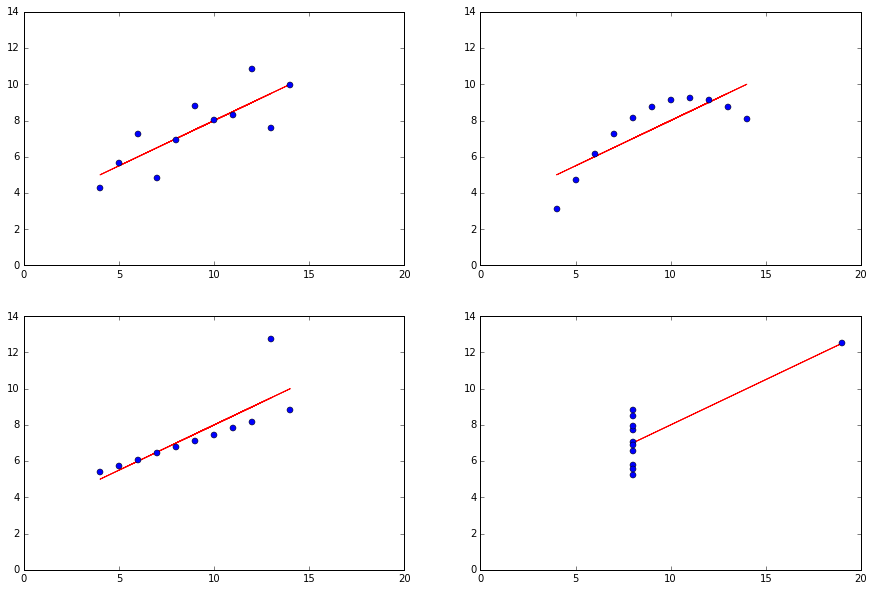

In [7]:
# Make plot inline
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 10))

# make first plot from data1 set it in left upper corner
plt.subplot(2, 2, 1)

# set limits of plot
plt.xlim([0,20])
plt.ylim([0,14])

# make the linregression in format ax+b
line1 = data1slope*data1[:,0]+data1intercept

#insert datapoints and linregressinon into plot
plt.plot(data1[:,0],line1,'r-',data1[:,0],data1[:,1],'o')


# make second plot from data1 set it in left upper corner
plt.subplot(2, 2, 2)

# set limits of plot
plt.xlim([0,20])
plt.ylim([0,14])

# make the linregression in format ax+b
line2 = data2slope*data2[:,0]+data2intercept

#insert datapoints and linregressinon into plot
plt.plot(data2[:,0],line2,'r-',data2[:,0],data2[:,1],'o')


# make third plot from data1 set it in left upper corner
plt.subplot(2, 2, 3)

# set limits of plot
plt.xlim([0,20])
plt.ylim([0,14])

# make the linregression in format ax+b
line3 = data3slope*data3[:,0]+data3intercept

#insert datapoints and linregressinon into plot
plt.plot(data3[:,0],line3,'r-',data3[:,0],data3[:,1],'o')


# make third plot from data1 set it in left upper corner
plt.subplot(2, 2, 4)

# set limits of plot
plt.xlim([0,20])
plt.ylim([0,14])

# make the linregression in format ax+b
line4 = data4slope*data4[:,0]+data4intercept

#insert datapoints and linregressinon into plot
plt.plot(data4[:,0],line4,'r-',data4[:,0],data4[:,1],'o')

# show the plot
plt.show()

### Explain - in your own words - what you think my point with this exercise is.

The point with the exercise is to show the simpson paradox, and how if you look at the data the visually you can see that it is very different. But if you look at the pure numbers from the top, the data look very similar therefore the conclusions sometimes needs to be visualized for one to get a point across

# Part 3: Probability (DSFS Chapter 6)

## _Exercise_: Central limit theorem 

### Use Python's `random` module to simulate rolling a fair six-sided die 10 000 000 times.

In [8]:
# import random from python
import random

# make list of 1000000 die rolls
rolls = [random.choice([1, 2, 3, 4, 5, 6]) for _ in range(10000000)]

### Plot the distribution of dice rolls using a bar-chart. _Hint_: Use `counter` (see p. 24) to bin the values, then go back to Chapter 3 for examples of how to plot bar-charts (or try Google $\rightarrow$ _stackoverflow_).

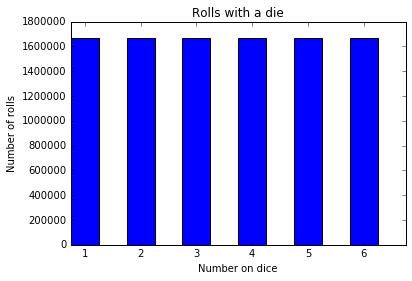

In [9]:
# import counter from collection
from collections import Counter

# count the number of rolls by each number
counter = Counter(rolls)

# setup plot
labels, values = zip(*Counter(rolls).items())
indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.ylabel('Number of rolls')
plt.xlabel('Number on dice')
plt.title('Rolls with a die')

plt.show()

### Describe the shape of the distribution.

The distribution is flat and looks even

### Now perform a new simulation. Roll a fair six-sided die 10 times and take the _average_. Do that 1 000 000 times.

In [10]:
# import division so the average is decimal
from __future__ import division

# function for rolling 10 times and taking the average
def rollTenAverage():
    rolls = [random.choice([1, 2, 3, 4, 5, 6]) for _ in range(10)]
    return sum(rolls) / len(rolls)

# take average of 10 rolls of a die 1000000 times
rolls = [rollTenAverage() for _ in range(100000)]

### Plot the distribution of those average values. This time you can't use `counter` (since the averages are not integer values). 

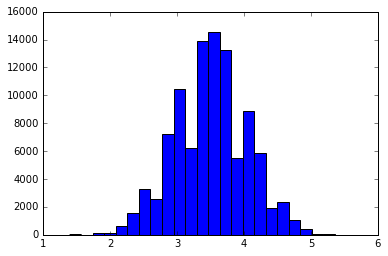

In [11]:
# plot the values

plt.hist(rolls, bins=25)
plt.show()

### Instead use `numpy.histogram` to bin those number into 25 bins. 

In [12]:
# make list into numpy array
arrRolls = np.asarray(rolls)

# make numpy histogram
history, bin_edges = np.histogram(arrRolls, 25)

### What does the numpy.histogram function return? Do the two arrays have the same length?

The histogram returns two arrays with one with the data which is called history and one with the edges of the bins called bin_edges. The bin_edges array is one element longer then then histogram, because it defines the edges that holds the history

### Then let's use matplotlib.pyplot.bar to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

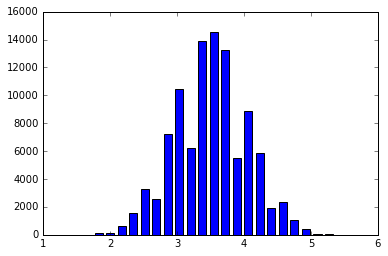

In [13]:
# plot history
width = 0.7 * (bin_edges[1] - bin_edges[0])
center = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.bar(center, history, align='center', width=width)

plt.show()

I deal with the different lengths by making the bin_edges array into an array of same length as the histogram, and centering the data between two bin_edges. This is done by splicing the bin_edges array into an array which goes from [0-bin_edges_lenght-1] and an array that goes from [1-bin_edges_length]. Then these two arrays are added together and divided by 2, so we find the center of each bin. Then it is just a matter of plotting it normally

### Describe the shape of this distribution. Explain in your own words what happened to that flat distribution of die-rolls to suddenly make it Gaussian just by taking some averages.

### Calculate the mean μ and standard deviation σobserved of the averaged values. Could you have predicted these values by reading DSFS pp. 78-80?

# Part 4: Hypothesis and inference (DSFS Chapter 7)

## Exercises: Did you read the text?

### What's the null hypothesis when testing if a coin is fair?

### Explain in your own words what Joel means by significance on p. 83.

### Explain in your own words what Joel means by power on p. 83.

### Write down a short definition of $p$-value.

### Explain the problem with $p$-hacking.